# **1.Defining the Question**

# **a) Specifying the Data Analytic Question**


To effectively predict the survivals and deaths of the Titanic disaster using K-nearest neighbours classifier.

# **b) Defining the Metric for Success**


Our project will be considered successful if we are able to effectively apply KNN model to make the predictions.

# **c).Understanding the Context**

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg ...

We shall use K-NN Classifier to build an optimum model that predicts whether a person survived or not on the Titanic based on the features provided.


# **d) Recording the Experimental Design**

1.Defining the Question

2.Reading the Data.

3.Checking the Data.

4.Data Cleaning

5.Performing EDA

6.Building KNN Prediction Model

7.Optimization

8.Challenging the solution

9.Conclusion

# **e) Data Relevance**


This will be discussed at the end of the project.

# **2.Reading the Data**

**Importing our Libraries**

In [393]:
#importing all the relevant libraries for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score



**Loading the Datasets**

In [394]:
#loading the train dataset
df_train=pd.read_csv('/content/train (5).csv')
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [395]:
#loading the test dataset
df_test=pd.read_csv('/content/test (1).csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




# **3. Checking the Data**

In [396]:
# Determining the no. of records in our train dataset
#
df_train.shape

(891, 12)

In [397]:
# Determining the no. of records in our test dataset
#
df_test.shape

(418, 11)

In [398]:
# Checking whether each column has an appropriate datatype
#
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [399]:
# Checking whether each column has an appropriate datatype
#
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [400]:
#checking the columns
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [401]:
df_test.columns

#the test dataset doesn't have the 'Survived' column

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 4. External Data Source Validation

## 5. Tidying the Dataset

**Data Cleaning-Train Dataset**

In [402]:
# Checking for duplicates

df_train.duplicated().sum()


0

In [403]:

#Dropping the columns that do contribute to our prediction
 

df_train.drop(['Ticket','Cabin','Name'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [404]:
# Checking for miising values

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [405]:
# Imputing the nulls on age column

#function to impute nulls in age column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [406]:
#applying function on dataset
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

In [407]:
#we will drop the nulls in embarked column since they're only 2
#drop nulls
df_train.dropna(axis=0,inplace=True)

In [408]:
#checking if all the nulls have been dealt with

df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [409]:
# checking the new shape of the dataframe
df_train.shape
#

(889, 9)

**Data Cleaning-Test Dataset**

Test dataset does not have the target variable hence we will only use it to make predictions.Train dataset will be usewd to build the prediction model

In [410]:
df_test.shape

(418, 11)

In [411]:
#checking for duplicates

df_test.duplicated().sum()

0

In [412]:
#checking for null values
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [413]:

#imputing nulls in age column using the median
# So let's write a function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 24

    else:
        return Age

In [414]:
#applying function on dataset
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [415]:
#dropping the columns that wont be necessary 

df_test.drop(['Ticket','Cabin','Name'], axis=1, inplace=True)


In [416]:
#drop nulls
df_test.dropna(axis=0,inplace=True)

In [417]:
#checking if the columns have been dropped
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [418]:
#checking the new shape
df_test.shape

(417, 8)

In [419]:
#checking for null values again,we nolonger have any null values in our dataframe
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# **6.Exploratory Data Analysis**

In [420]:
#checking the summary statistics of test dataframe
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,2.263789,29.330935,0.448441,0.393285,35.627188
std,120.923774,0.842077,12.916807,0.897568,0.982419,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,1205.000000,3.000000,36.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [421]:
#checking the summary statistics of the train dataframe
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


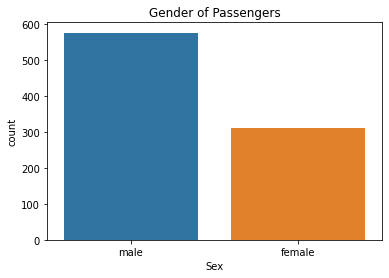

In [422]:

#Count plots for Gender
sns.countplot(x='Sex',data=df_train)
plt.title('Gender of Passengers')
plt.show()

From the histogram we cansee that the number of males present as higher than female

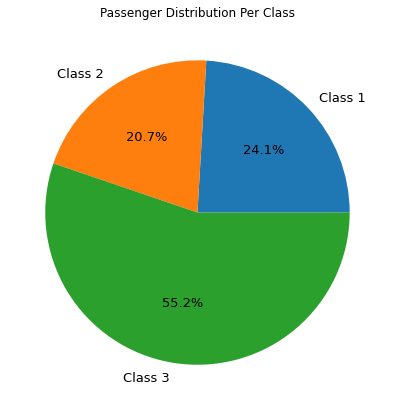

In [423]:
#the distribution of passenger classes
pclass = df_train.groupby('Pclass')['Pclass'].count()

plt.figure(figsize=(10,7))
plt.title('Passenger Distribution Per Class')
plt.pie(pclass.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

# there were more passengers in 3rd class

Majority of the passengers were in 3rd class which makes sence since its quite cheaper,1st class had a slight higher number compared to 2nd class

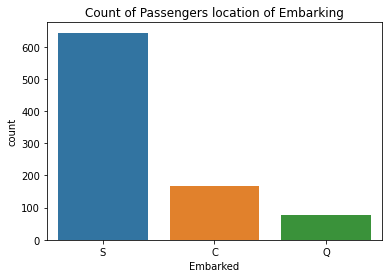

In [424]:
#Count plots for Embarked
sns.countplot(x='Embarked',data=df_train)
plt.title('Count of Passengers location of Embarking')
plt.show()

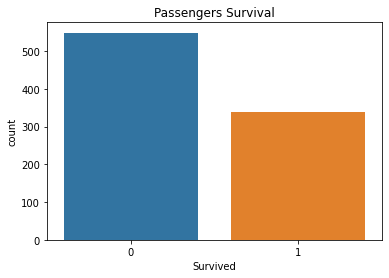

In [425]:
#Count plots for Survived
sns.countplot(x='Survived',data=df_train)
plt.title('Passengers Survival')
plt.show()

With 0 representing those who survived and 1 tho who did not survive,Majority of the passengers did not survive

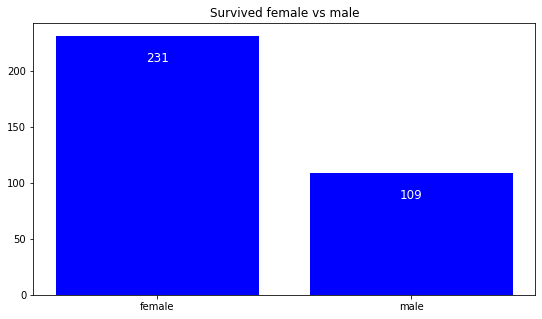

In [426]:
# let us find out the number of survived persons based on their gender

survived = df_train.groupby('Sex')['Survived'].sum()

plt.figure(figsize=(9,5))
plt.bar(survived.index, survived.values, color='blue')
plt.title('Survived female vs male')
for i, value in enumerate(survived.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Majority of those who survived were female

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



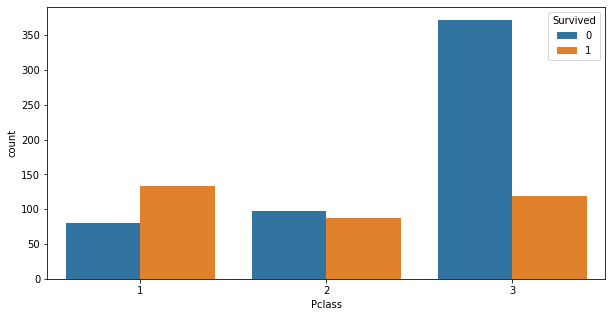

In [427]:
#checking the survival per class
# let us see the survival per class
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df_train["Pclass"],hue = df_train["Survived"],ax=ax, data = df_train)

# most passengers in 1st class survived
# equal number of passengers in 2nd class survived and died
# most passengers in 3rd class  died
#

Majority of the passengers in 3rd class did not survive while equal percentage of those who survived and died in 2nd class,majority of those in 1st class survived.

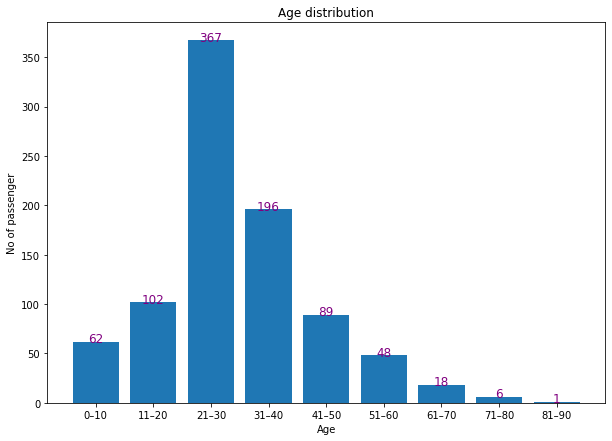

In [428]:

#let us see the age distribution
# retrieve all non-NaN age values and then store the result to ages Numpy array
ages = df_train[df_train['Age'].notnull()]['Age'].values

ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

#define labels in ages_hist_labels
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60',
                    '61–70', '71–80', '81–90']

#we can show the histogram like this
plt.figure(figsize=(10,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12, color='purple',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Majority of the passengers were aged between 21yrs and 40yrs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee3eb41f90>,
      dtype=object)

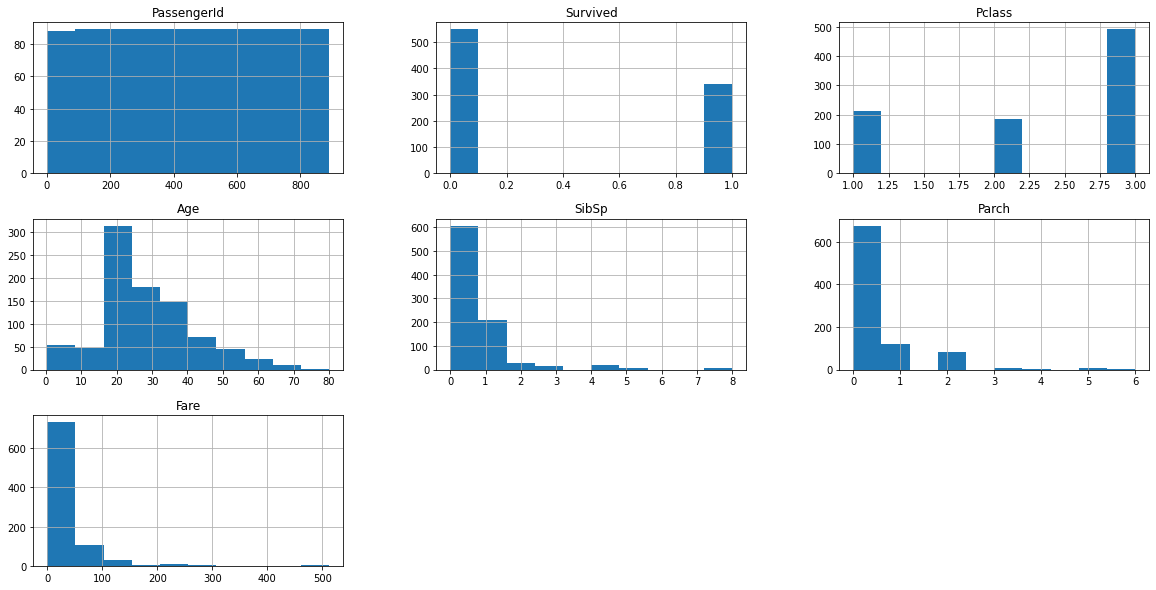

In [429]:
#plotting histograms to visualize patterns in the data
df_train.hist(figsize = (20,10))

**Bivariate Analysis**

<Figure size 432x288 with 0 Axes>

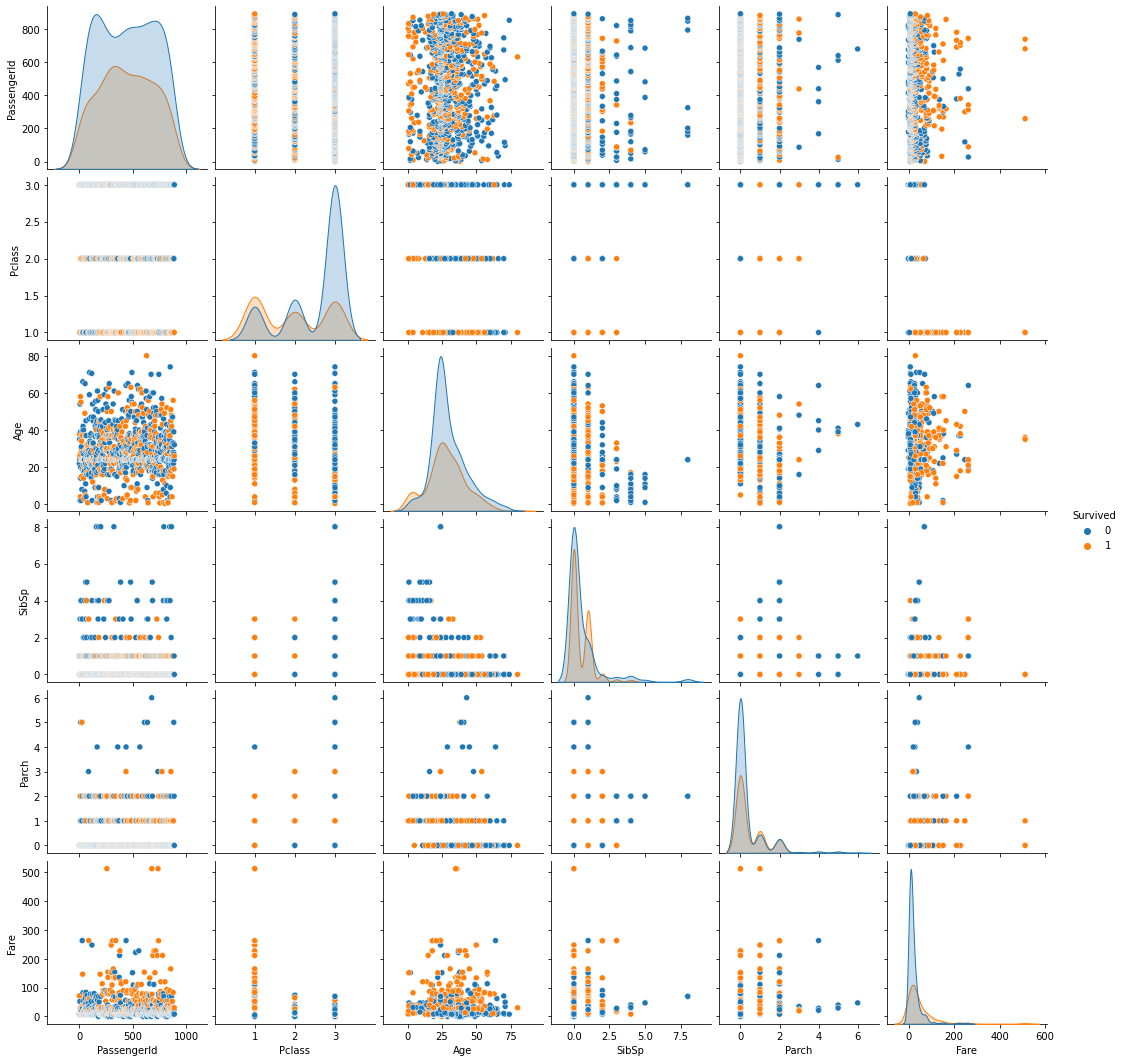

In [430]:
#plotting the bivariate summaries
# Plot the pairplot
plt.figure()
sns.pairplot(df_train, hue='Survived')
plt.show()

In [431]:
#checking the correlations
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


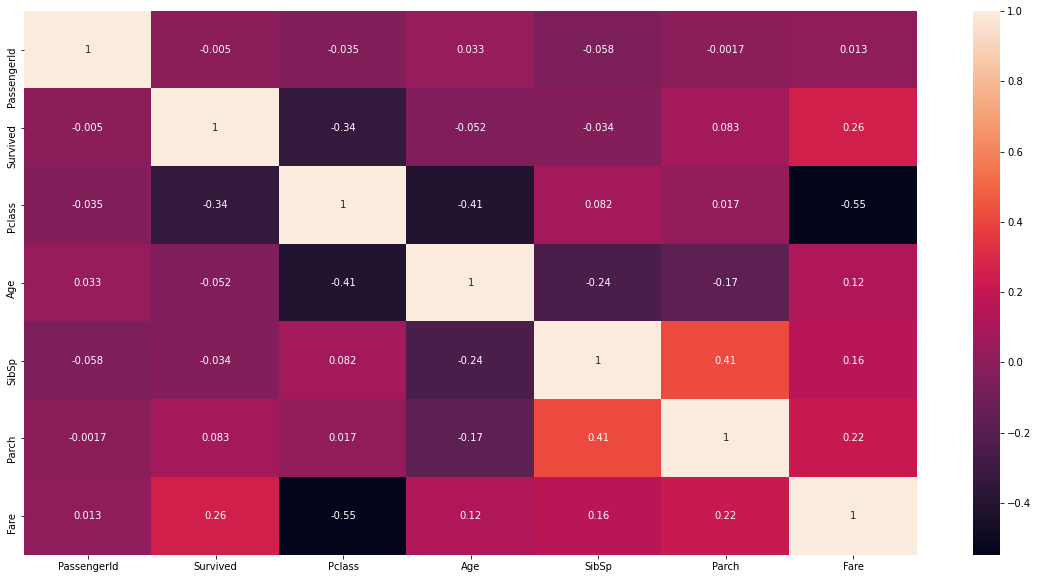

In [432]:
#pearson correlations heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

**Feature Engineering**

In [433]:
#Encode categorical data for train dataframe
#label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])

#One hot encode Embarked column using get dummies
df_train2 = pd.get_dummies(df_train)

In [434]:
#Viewing encoded categories.for test dataframe
df_train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


# **7. Implementing the Solution**

**Checking Multicollinearity**

In [435]:
#multicollinearity test
# Let's display the correlations between the variables
correlations = df_train2[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']].corr()

correlations

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.541585,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,0.127741,-0.405549,0.081656,0.016824,-0.548193
Sex,-0.541585,0.127741,1.000000,0.083730,-0.116348,-0.247508,-0.179958
Age,-0.052051,-0.405549,0.083730,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.034040,0.081656,-0.116348,-0.242807,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.247508,-0.170089,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,-0.179958,0.120938,0.160887,0.217532,1.000000


The features have an acceptable range

**Train,Test,Split 80-20**

In [436]:
# Declaring our X and y variables
# 
X =df_train2.drop('Survived', axis=1)
y =df_train2.Survived

# Train Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = classifier.predict(X_train)

Accuracy score =: 0.7303370786516854 ,f1 score = 0.6417910447761194
[[87 18]
 [30 43]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       105
           1       0.70      0.59      0.64        73

    accuracy                           0.73       178
   macro avg       0.72      0.71      0.71       178
weighted avg       0.73      0.73      0.73       178



**Train Test Split 70-30**

In [437]:
# Declaring our X and y variables
# 
X = df_train2.drop('Survived', axis=1)
y = df_train2.Survived

# Train Test Split (70-30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.7940074906367042 ,f1 score = 0.7290640394088671
[[138  19]
 [ 36  74]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.67      0.73       110

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



**Train Test Split 60-40**

In [438]:

# Declaring our X and y variables
# 
X = df_train2.drop('Survived', axis=1)
y = df_train2.Survived

# Train Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

# Feature Scaling
# it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.7865168539325843 ,f1 score = 0.6984126984126985
[[192  24]
 [ 52  88]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       216
           1       0.79      0.63      0.70       140

    accuracy                           0.79       356
   macro avg       0.79      0.76      0.77       356
weighted avg       0.79      0.79      0.78       356



Accuracy Score Summaries:

80-20 split = 0.71% , F1 score 63%

70-30 split = 0.79%, F1 score 73%

60-40 spit = 0.79%, F1 score 70%





Since our 70-30 split gave us the best accuracy score, we perform optimization on it to see if the accuracy score improves.

**Optimization**

Text(0, 0.5, 'Error Rate')

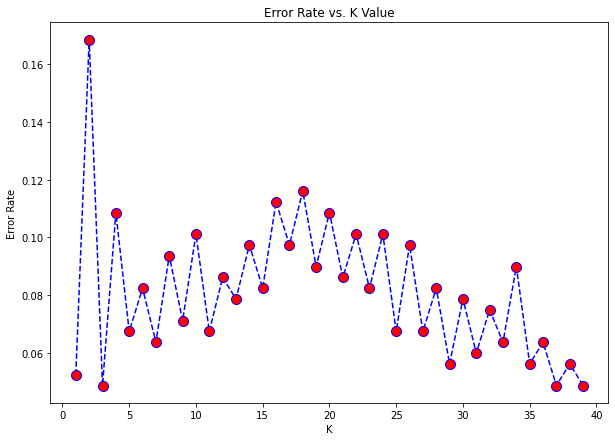

In [439]:

#Choosing the 70/30 split to perform optimization on
#Perform k optimization

#features and label
X = df_train2.drop('Survived', axis=1)
y = df_train2['Survived']

#define split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#scale the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
  

#Using error rates
error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The mean error is 0 when the value of K is 3.we will apply this when finding the best params and at K=15 the variance in the error rate is low.

In [440]:

#run model with optimal k and split
#Choosing the 60/40 split to perform optimization on
#Perform k optimization

#features and label
X = df_train2.drop('Survived', axis=1)
y = df_train2['Survived']

#define split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#scale the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#create and fit model
classifier = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#evaluate model
print('Training Accuracy:', accuracy_score(y_train, classifier.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.837620578778135
Test Accuracy: 0.7902621722846442


Confusion Matrix:
[[140  17]
 [ 39  71]]


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.81      0.65      0.72       110

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



After optimization our accuracy score impoves from 79% to 84% using a 70-30 split at k=15

**Predicting Test Set Results**

In [441]:
#creating copy to work with
df_test2 = df_test.copy(deep=True)


In [442]:
#Encode categorical data for test dataset
#label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['Sex'] = le.fit_transform(df_test['Sex'])

#One hot encode Embarked column using get dummies
df_test2 = pd.get_dummies(df_test)

In [443]:
df_test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,1


In [444]:
df_test2.shape

(417, 10)

In [445]:

##features of test set
X = df_test2


#predicting the test
y_pred = classifier.predict(X)

In [446]:
#viewing array of predictions
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [447]:
#predictions 
col_name = ['survival_pred']
preds_test = pd.DataFrame(y_pred, columns=col_name)
preds_test.head()


,survival_pred
0,1
1,0
2,0
3,0
4,0


In [448]:

#predictions as a df appended to test set
col_name = ['predicted_survival']
preds_test = pd.DataFrame(y_pred, columns=col_name)

#append to test set
test_predicted = pd.concat([df_test2, preds_test], axis=1)
test_predicted.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,predicted_survival
0,892.0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0
1,893.0,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0
2,894.0,2.0,1.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0
3,895.0,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,0.0
4,896.0,3.0,0.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0


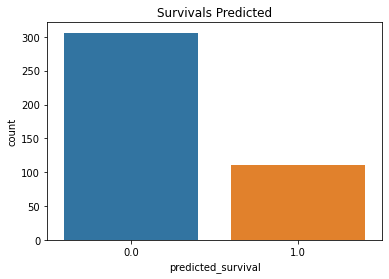

In [449]:
#Count plots: Predicted survival status (1: Survived and 0:Not survived)
sns.countplot(x='predicted_survival',data=test_predicted)
plt.title('Survivals Predicted')
plt.show()

From the histogram we can conclude that majority people from the test data did not survive

## 8. Challenging the solution

Other prediction models could also be used for this analysis to improve the accuracy.Other classification algorithms could also be used.

## 9. Follow up questions

### a). Did we have the right data?

Yessince we successsfully achieved our metric of success,our model was able to make effective predictions

### b). Do we need other data to answer our question?

No we had sufficient data.

### c). Did we have the right question?

yes,we had the right question given the dataset.